# 🐶 Dogs Dataset - 3000 Records 🐾

## Source
Kaggle: https://www.kaggle.com/datasets/waqi786/dogs-dataset-3000-records

## Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_org = pd.read_csv("data/dogs_dataset.csv")

In [4]:
df_org.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


In [5]:
len(df_org)

3000

In [6]:
df = df_org.copy()

In [7]:
df.columns = ['breed', 'age_years', 'weight_kg', 'color', 'gender']

In [8]:
df.nunique()

breed        53
age_years    14
weight_kg    55
color        16
gender        2
dtype: int64

In [9]:
df.dtypes

breed        object
age_years     int64
weight_kg     int64
color        object
gender       object
dtype: object

In [10]:
for col in df.columns:
    print(f"{col} -> ", end="")
    print(df[col].unique())
    print("-------------------------------------")

breed -> ['Airedale Terrier' 'Jack Russell Terrier' 'Dogo Argentino'
 'Labrador Retriever' 'French Bulldog' 'Bull Terrier' 'Boxer'
 'Cocker Spaniel' 'Shetland Sheepdog' 'Whippet' 'Weimaraner' 'Havanese'
 'Beagle' 'Maltese' 'Siberian Husky' 'German Shepherd' 'Bloodhound'
 'Irish Setter' 'Doberman Pinscher' 'Vizsla' 'Bernese Mountain Dog'
 'Shih Tzu' 'Yorkshire Terrier' 'Boston Terrier' 'Chinese Shar-Pei' 'Pug'
 'Poodle' 'Australian Shepherd' 'Miniature Schnauzer' 'Saint Bernard'
 'Rottweiler' 'Pekingese' 'Chihuahua' 'Shiba Inu' 'Schnauzer' 'Dachshund'
 'Papillon' 'Pembroke Welsh Corgi' 'Great Dane' 'Akita' 'Basenji'
 'Bulldog' 'Belgian Malinois' 'West Highland White Terrier' 'Bichon Frise'
 'Lhasa Apso' 'Cavalier King Charles Spaniel' 'Alaskan Malamute'
 'Golden Retriever' 'Pomeranian' 'Border Collie' 'Samoyed'
 'Chesapeake Bay Retriever']
-------------------------------------
age_years -> [13 10  2  9 12  7  1  3  4  6 11  8  5 14]
-------------------------------------
weight_kg -> [35

In [11]:
df.describe()

,age_years,weight_kg
count,3000.000000,3000.000000
mean,7.499000,32.059667
std,4.011238,15.628463
min,1.000000,5.000000
25%,4.000000,19.000000
50%,8.000000,33.000000
75%,11.000000,45.000000
max,14.000000,59.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   breed      3000 non-null   object
 1   age_years  3000 non-null   int64 
 2   weight_kg  3000 non-null   int64 
 3   color      3000 non-null   object
 4   gender     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


## Visual analysis

### Isolated analysis

#### Breed

In [13]:
def pie_hist_top(df: pd.DataFrame, col: str, top: int = 5, axs = plt):
    df_grp = df[col].value_counts().sort_values(ascending=False)
    top = min(top, len(df_grp))
    labels = df_grp.index[:top].to_list() + ["" for _ in range(top, len(df_grp))]
    axs.pie(df_grp.values.tolist(), labels=labels, rotatelabels=10)


In [35]:
def pie_hist_all(df: pd.DataFrame, top: int = 5):
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(12, 6)
    pie_hist_top(df, "breed", top, ax1)
    pie_hist_top(df, "age_years", top, ax2)
    pie_hist_top(df, "weight_kg", top, ax3)
    pie_hist_top(df, "color", top, ax4)
    pie_hist_top(df, "gender", top, ax5)

    ax1.set_title("breed")
    ax2.set_title("age_years")
    ax3.set_title("weight_kg")
    ax4.set_title("color")
    ax5.set_title("gender")

    ax6 = None

    plt.show()

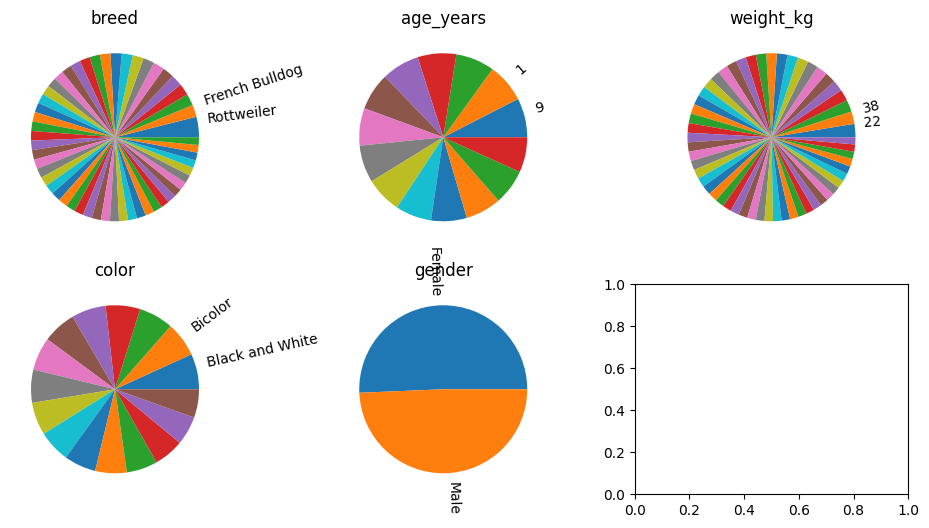

In [36]:
pie_hist_all(df, top=2)

Note: Data is mostly uniform w.r.t. Bread, with an exception of "Rottweiler" which has twice data entries that average per Bread data entries
Note: Data is fairly uniform w.r.t. other columns

### Relative analysis

In [16]:
df.columns

Index(['breed', 'age_years', 'weight_kg', 'color', 'gender'], dtype='object')

In [20]:
df[["breed", 'age_years']].groupby("breed").mean().sort_values("age_years", ascending=False).describe()

,age_years
count,53.000000
mean,7.511378
std,0.531414
min,6.320000
25%,7.148148
50%,7.563636
75%,7.864407
max,8.660714


In [18]:
df[["breed", 'weight_kg']].groupby("breed").mean().sort_values("weight_kg", ascending=False).std()

weight_kg    2.007689
dtype: float64

In [19]:
df[df["breed"] == "Rottweiler"][['age_years', 'weight_kg']].groupby("age_years").describe()

weight_kg                                                      
              count       mean        std   min    25%   50%    75%   max
age_years                                                                
1               8.0  29.500000  18.905781   7.0  12.50  29.0  46.25  54.0
2               9.0  28.333333  12.845233  10.0  19.00  27.0  36.00  53.0
3               3.0  41.333333  15.947832  23.0  36.00  49.0  50.50  52.0
4               9.0  37.777778  16.037283   6.0  31.00  41.0  49.00  57.0
5               6.0  37.500000  18.833481  14.0  21.75  41.0  52.00  58.0
6               9.0  29.888889  16.669166  11.0  17.00  21.0  47.00  52.0
7              13.0  31.461538  13.690723   8.0  19.00  37.0  40.00  48.0
8              12.0  24.416667  16.538981   5.0  13.25  21.5  31.50  59.0
9               6.0  36.000000  15.874508  15.0  24.25  38.5  45.25  57.0
10             12.0  30.666667  16.316937   7.0  16.50  32.0  41.00  56.0
11              8.0  31.875000  15.065927   7.0  24.25  30.5  40.75  57.0
12              8.0  32.625000  16.282659  12.0  23.00  29.5  44.25  57.0
13             10.0  29.200000  16.817980   9.0  18.50  22.5  44.25  54.0
14              5.0  16.600000  13.334167   6.0   7.00   8.0  28.00  34.0

In [27]:
df['breed'].unique()

array(['Airedale Terrier', 'Jack Russell Terrier', 'Dogo Argentino',
       'Labrador Retriever', 'French Bulldog', 'Bull Terrier', 'Boxer',
       'Cocker Spaniel', 'Shetland Sheepdog', 'Whippet', 'Weimaraner',
       'Havanese', 'Beagle', 'Maltese', 'Siberian Husky',
       'German Shepherd', 'Bloodhound', 'Irish Setter',
       'Doberman Pinscher', 'Vizsla', 'Bernese Mountain Dog', 'Shih Tzu',
       'Yorkshire Terrier', 'Boston Terrier', 'Chinese Shar-Pei', 'Pug',
       'Poodle', 'Australian Shepherd', 'Miniature Schnauzer',
       'Saint Bernard', 'Rottweiler', 'Pekingese', 'Chihuahua',
       'Shiba Inu', 'Schnauzer', 'Dachshund', 'Papillon',
       'Pembroke Welsh Corgi', 'Great Dane', 'Akita', 'Basenji',
       'Bulldog', 'Belgian Malinois', 'West Highland White Terrier',
       'Bichon Frise', 'Lhasa Apso', 'Cavalier King Charles Spaniel',
       'Alaskan Malamute', 'Golden Retriever', 'Pomeranian',
       'Border Collie', 'Samoyed', 'Chesapeake Bay Retriever'],
      dtype=o

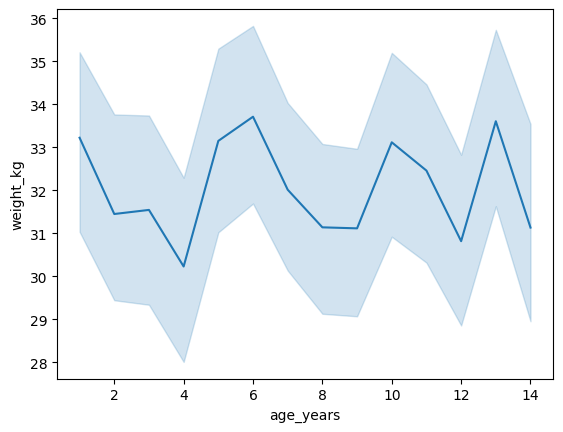

In [28]:
# breed = "Golden Retriever"
# sns.lineplot(df[['age_years', 'weight_kg']].groupby("age_years").mean())
sns.lineplot(df, x="age_years", y="weight_kg")
plt.show()

### Deep analysis

In [30]:
df.columns

Index(['breed', 'age_years', 'weight_kg', 'color', 'gender'], dtype='object')

In [60]:
breed_mean = df.groupby("breed")[["age_years", "weight_kg"]].mean().reset_index()

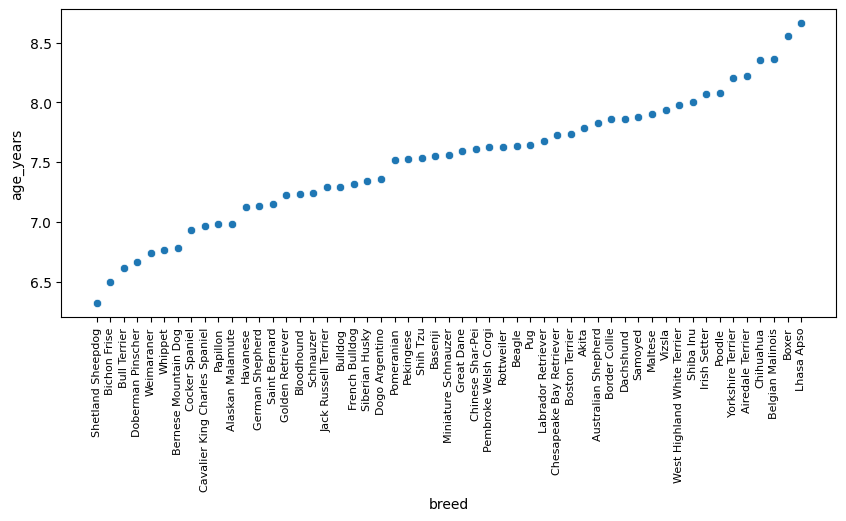

In [67]:
plt.figure(figsize=(10, 4))
fig = sns.scatterplot(breed_mean.sort_values("age_years", ascending=True), x = "breed", y = "age_years")
fig.tick_params(axis="x", rotation=90, labelsize=8)
plt.show()

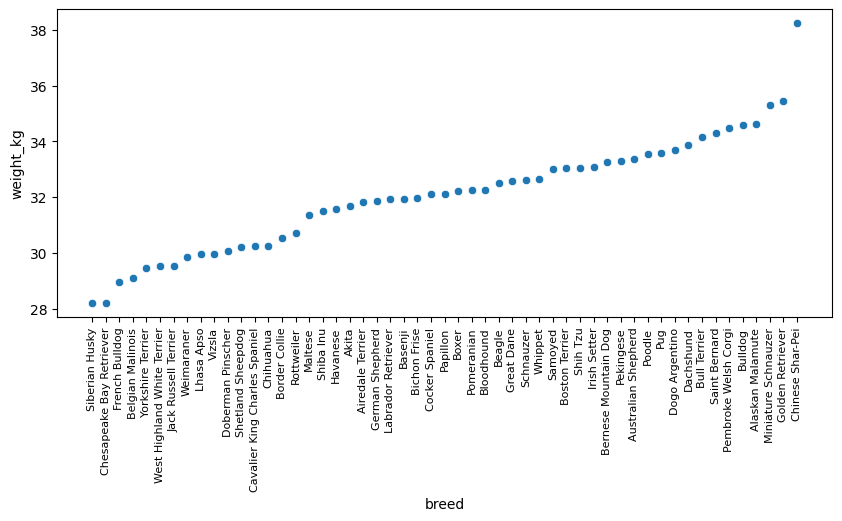

In [68]:
plt.figure(figsize=(10, 4))
fig = sns.scatterplot(breed_mean.sort_values("weight_kg", ascending=True), x = "breed", y = "weight_kg")
fig.tick_params(axis="x", rotation=90, labelsize=8)
plt.show()

In [69]:
df.groupby("gender")[["age_years", "weight_kg"]].mean()

,age_years,weight_kg
gender,,
Female,7.510526,31.903289
Male,7.487162,32.220270


In [41]:
df['weight_kg'].corr(df["age_years"])

-0.003107995248341748